In [3]:
%load_ext autoreload
%autoreload
from imports import *
%matplotlib inline

In [4]:
subway_df = pd.read_csv('improved-dataset/turnstile_weather_v2.csv')
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258,55.98,7.86,40.700348,-73.887177


In [5]:
subway_df.describe()

,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,hour,day_week,weekday,latitude,longitude,fog,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
count,4.264900e+04,4.264900e+04,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,...,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000,42649.000000
mean,2.812486e+07,1.986993e+07,1886.589955,1361.487866,10.046754,2.905719,0.714436,40.724647,-73.940364,0.009824,...,29.971096,0.224741,63.103780,6.927872,0.004618,29.971096,63.103780,6.927872,40.728555,-73.938693
std,3.043607e+07,2.028986e+07,2952.385585,2183.845409,6.938928,2.079231,0.451688,0.071650,0.059713,0.098631,...,0.137942,0.417417,8.455597,4.510178,0.016344,0.131158,6.939011,3.179832,0.065420,0.059582
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,40.576152,-74.073622,0.000000,...,29.550000,0.000000,46.900000,0.000000,0.000000,29.590000,49.400000,0.000000,40.600204,-74.014870
25%,1.039762e+07,7.613712e+06,274.000000,237.000000,4.000000,1.000000,0.000000,40.677107,-73.987342,0.000000,...,29.890000,0.000000,57.000000,4.600000,0.000000,29.913333,58.283333,4.816667,40.688591,-73.985130
50%,1.818389e+07,1.331609e+07,905.000000,664.000000,12.000000,3.000000,1.000000,40.717241,-73.953459,0.000000,...,29.960000,0.000000,61.000000,6.900000,0.000000,29.958000,60.950000,6.166667,40.720570,-73.949150
75%,3.263049e+07,2.393771e+07,2255.000000,1537.000000,16.000000,5.000000,1.000000,40.759123,-73.907733,0.000000,...,30.060000,0.000000,69.100000,9.200000,0.000000,30.060000,67.466667,8.850000,40.755226,-73.912033
max,2.357746e+08,1.493782e+08,32814.000000,34828.000000,20.000000,6.000000,1.000000,40.889185,-73.755383,1.000000,...,30.320000,1.000000,86.000000,23.000000,0.157500,30.293333,79.800000,17.083333,40.862064,-73.694176


---

In [6]:
rain_entries = subway_df[subway_df.rain == 0]['ENTRIESn_hourly'].values
norain_entries = subway_df[subway_df.rain == 1]['ENTRIESn_hourly'].values

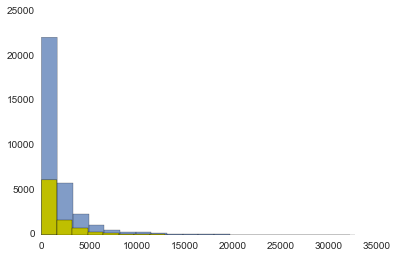

In [7]:
plt.hist(rain_entries, alpha=0.7, bins=20)
plt.hist(norain_entries, color='y', bins=20)
plt.show()

---

In [8]:
subway_df.dtypes

UNIT                object
DATEn               object
TIMEn               object
ENTRIESn             int64
EXITSn               int64
ENTRIESn_hourly    float64
EXITSn_hourly      float64
datetime            object
hour                 int64
day_week             int64
weekday              int64
station             object
latitude           float64
longitude          float64
conds               object
fog                  int64
precipi            float64
pressurei          float64
rain                 int64
tempi              float64
wspdi              float64
meanprecipi        float64
meanpressurei      float64
meantempi          float64
meanwspdi          float64
weather_lat        float64
weather_lon        float64
dtype: object

In [9]:
subway_df = subway_df.drop(['ENTRIESn', 'EXITSn', 'EXITSn_hourly'], axis=1)

In [245]:
# scale
#for col in subway_df.columns:
#    if subway_df[col].dtype == 'float64':
#        scaler = StandardScaler()
#        scaler.fit(subway_df.latitude)
#        subway_df[col] = scaler.transform(subway_df[col])

In [10]:
for col in subway_df.columns:
    if subway_df[col].dtype == 'object':
        subway_df[col] = subway_df[col].astype('category')
        subway_df[col] = pd.get_dummies(subway_df[col])
        
#subway_df.UNIT[:5]
#subway_df.UNIT.cat.categories
#subway_df.UNIT.cat.codes[-5:]

In [11]:
subway_df = subway_df.replace([np.inf, -np.inf], np.nan)
subway_df = subway_df.dropna()

In [12]:
for i in xrange(len(subway_df.columns)):
    print i, subway_df.columns[i], subway_df.corr()['ENTRIESn_hourly'].values[i]

0 UNIT -0.0354342421221
1 DATEn -0.0453634084609
2 TIMEn -0.0748766752846
3 ENTRIESn_hourly 1.0
4 datetime -0.0135229731926
5 hour 0.286797778319
6 day_week -0.0948969898045
7 weekday 0.145430907275
8 station 0.0288184763285
9 latitude 0.11563465502
10 longitude -0.124047430137
11 conds 0.054221146558
12 fog -0.00859018109732
13 precipi -0.0276822628754
14 pressurei -0.0333609889257
15 rain 0.0258245212609
16 tempi 0.0895961348649
17 wspdi 0.0560304843059
18 meanprecipi 0.0356485157722
19 meanpressurei -0.00618590232987
20 meantempi -0.0266933483216
21 meanwspdi -0.0397239426652
22 weather_lat 0.0891555672778
23 weather_lon -0.137889385389


In [13]:
y = subway_df['ENTRIESn_hourly'].values
subway_df = subway_df.drop('ENTRIESn_hourly', axis=1)
X = subway_df.values
print X.shape, y.shape

(42649, 23) (42649,)


In [14]:
skb = SelectKBest(k='all')
skb = skb.fit(X,y)
X = skb.transform(X)
for i in xrange(len(subway_df.columns)):
    print i, subway_df.columns[i], np.round(skb.scores_[i], 2)

0 UNIT 0.21
1 DATEn 0.61
2 TIMEn 1.02
3 datetime 0.7
4 hour 2.35
5 day_week 0.91
6 weekday 0.96
7 station 2.79
8 latitude 0.84
9 longitude 1.06
10 conds 1.11
11 fog 0.93
12 precipi 0.71
13 pressurei 0.79
14 rain 1.06
15 tempi 1.36
16 wspdi 1.1
17 meanprecipi 1.28
18 meanpressurei 0.81
19 meantempi 0.95
20 meanwspdi 1.02
21 weather_lat 0.82
22 weather_lon 1.08


In [15]:
# add bias
#new_X = np.hstack((new_X, np.ones((new_X.shape[0], 1))))
poly = PolynomialFeatures(degree=1)
X = poly.fit_transform(X)
print X.shape

(42649, 24)


---

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

t0 = time()

############################################################################     

regr = LinearRegression()

regr.fit(X_train,y_train)

print regr.score(X_test,y_test)

############################################################################

print "\nminutes for learner to run:", round((time()-t0)/60.0, 3)

0.179173649058

minutes for learner to run: 0.003


In [ ]:
'''
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomizedpca', RandomizedPCA(copy=True, iterated_power=3, n_components=None, random_state=42,
       whiten=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

score:  0.305197373377

k = 23

PCA: True

minutes for learner to run: 0.464
'''